In [ ]:
# Data Story Exercise Answer

# For this story, I decided to use the dataset for my capstone project.
# This dataset was the result of combining results of different compound libraries
# I used for my Dengue virus high throughput screening. It is named DENV_HTS_data and
# is currently in a csv format and has the following layout:
#    CdId
#    MolWeight
#    MolFormula
#    LotNumber
#    DaughterPlate
#    PlateMap
#    PercentPurity
#    HCVHDAInh
#    DENVATPaseInh
#    IUPACName
#    SMILES
#    LogP
#    LogD
#    HBondDonors
#    HBondAcceptors
#    RotatableBonds
#    LipinskiRuleof5

# Initially, I wanted to create some plots that will answer the ff questions:
# 1) Since the dataset contain two columns that describe the Hepatitis C and Dengue Virus %Inhibition,
#    plot them side by side to visually see if any is more potent as an HCV inhibitor and vice versa.
# 2) Can a kdeplot give a visual presentation of how diverse the dataset is?
# 3) Does the number of rotatable bonds affect the degree of inhibition of the compound for
#    the Dengue virus?  Also, do higher number of bonds correspond to the compound passing Lipinski's Rule of 5?
# 4) What is the correlation between the number of hydrogen bond donors of a compound with its ability
#    to pass Lipinski's Rule of 5 and percent inhibition for the stopping the Dengue virus helicase activity?

# Having made these plots, I did easily notice a number of correlations:
#   1) The compounds with the lower number of rotatable bonds were more likely
#       also passed Lipinski's Rule of 5.  But this did not automatically imply
#       a higher percent inhibition of the Dengue helicase activity since one compound
#       with 2 rotatable bonds had about 58% inhibition while another with 10 rotatable 
#       bonds had about 55% inhibition.

#   2) The lower the number of hydrogen bond donors, a compound might have, the higher chance
#       it has of passing Lipinski's Rule of 5 and higher %inhibition also against the 
#       Dengue Virus helicase protein.

#   3) Most of the compounds have less than 40% inhibition for both HCV and Dengue helicase.

# Data Visualizations and Conclusion
#   Some basic plots are listed below that show the trends and correlations between molecular
# descriptors and inhibitory capability. To conclude, we learn that 1) most of the compounds in this
# assay had poor inhibition against the helicase protein of both Hepatitis C and Dengue Virus and
# 2) a lower number of hydrogen bond donors correlate with a higher inhibition rate against the DENV helicase
# but the number of rotatable bonds do not.


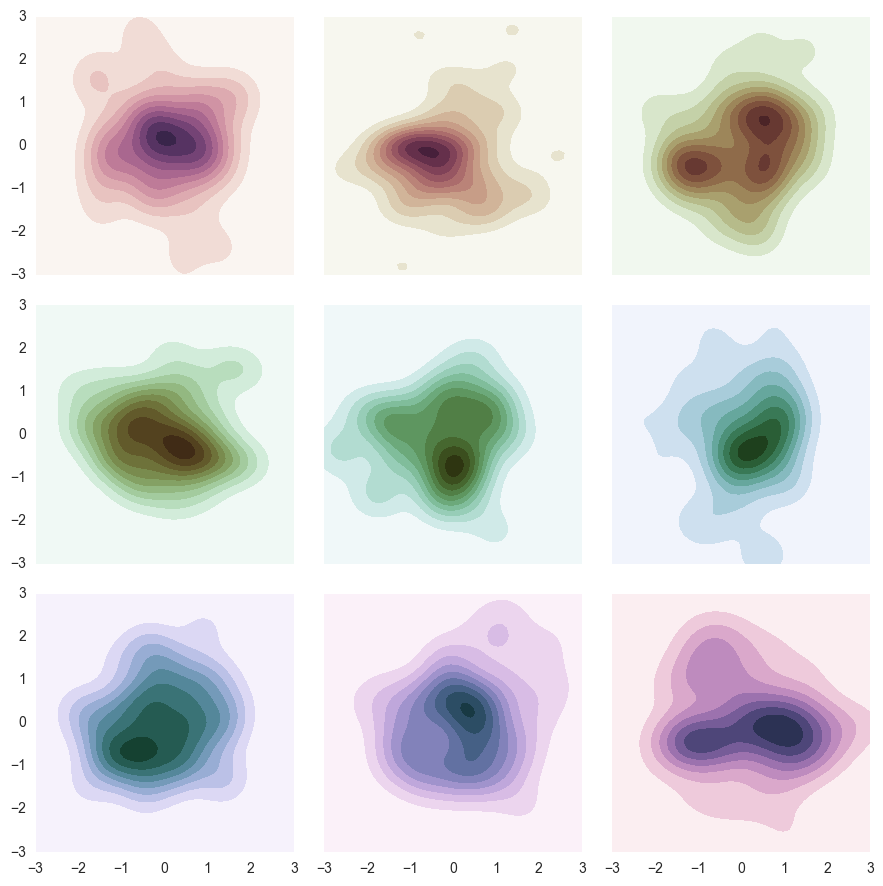

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# setting matplotlib style
plt.style.use('fivethirtyeight')

# loading data
data = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')

# seaborn kdeplot
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()




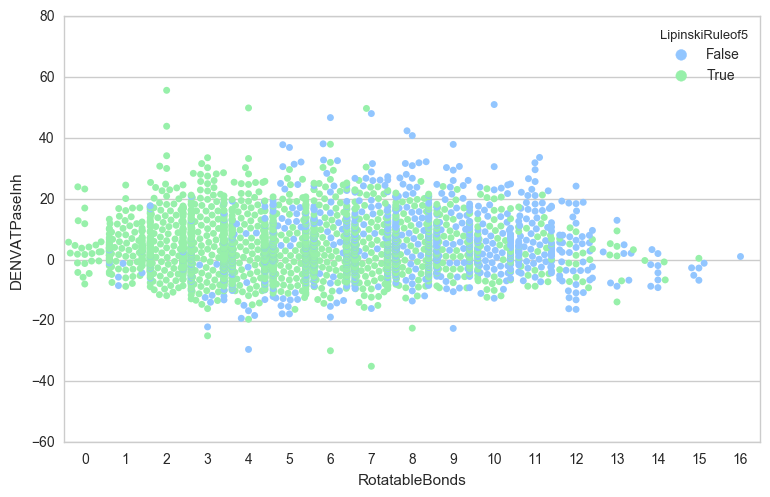

In [25]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')

# "Melt" the dataset to "long-form" or "tidy" representation
DENV = pd.melt(dataHTS, "RotatableBonds", var_name="LipinskiRuleof5")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="RotatableBonds", y="DENVATPaseInh", hue="LipinskiRuleof5", data=dataHTS)

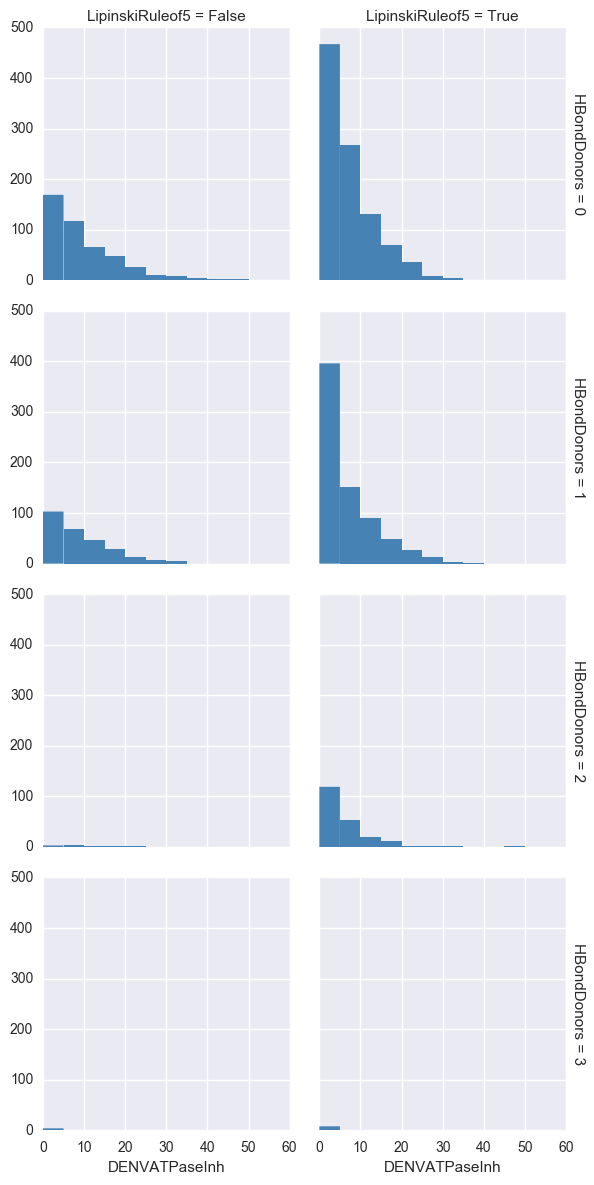

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1')  

g = sns.FacetGrid(dataHTS, row="HBondDonors", col="LipinskiRuleof5", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "DENVATPaseInh", color="steelblue", bins=bins, lw=0)

C:\Users\Noreena\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


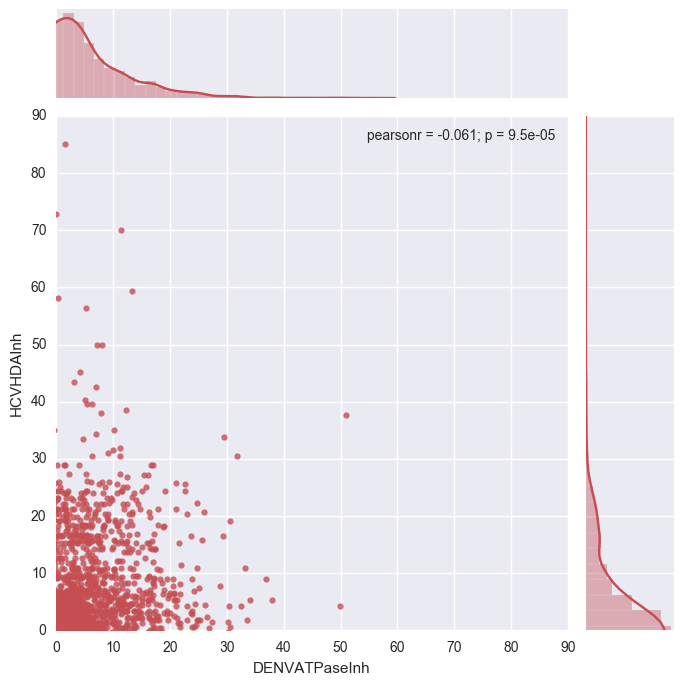

In [79]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# loading data
dataHTS = pd.read_csv('c:/Users/Noreena/Documents/IJCProjects2/DENV_HTS/DENV_HTS_Data.csv', encoding='latin-1') 

g = sns.jointplot("DENVATPaseInh", "HCVHDAInh", data=dataHTS, kind="reg",
                  xlim=(0, 90), ylim=(0, 90), color="r", size=7)